# EXPERIMENT NO 4

## LOGISTIC REGRESSION - NEW PRODUCT PURCHASE DATASET

In [89]:
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [90]:
def read_set():
    dataset=pd.read_csv('EXPERIMENT 4.csv')
    print('Starting Rows of Dataset:')
    print(dataset.head(),end='\n\n')
    x=dataset.iloc[:,[2,3]].values
    y=dataset.iloc[:,4].values
    return x,y

def split(x,y):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=0)
    sc_x=StandardScaler()
    xtrain=sc_x.fit_transform(xtrain)
    xtest=sc_x.fit_transform(xtest)
    print('Few Training Data:\n',xtrain[0:10,:])
    return xtrain,ytrain,xtest,ytest


In [91]:
def train_test_plot(xtrain,ytrain,xtest,ytest):
    classifier=LogisticRegression(random_state=0)
    classifier.fit(xtrain,ytrain)
    y_pred=classifier.predict(xtest)
    cm=confusion_matrix(ytest,y_pred)
    print("Confusion Matrix: \n",cm)
    print("Accuracy Score: ",accuracy_score(ytest,y_pred))
    X_set,y_set=xtest,ytest
    X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=.01),np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=.01))
    plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=.75,cmap=ListedColormap(('blue','yellow')))
    plt.xlim(X1.min(),X1.max())
    plt.ylim(X2.min(),X2.max())
    for i,j in enumerate(np.unique(y_set)):
        l=lambda j:'Yes' if(j==1) else 'No'
        plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],c=ListedColormap(('black','red'))(i),label=l(j))
    plt.title('Classifier (Test set)')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend(loc='best')
    plt.show()
        

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Starting Rows of Dataset:
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

Few Training Data:
 [[ 1.92295008  2.14601566]
 [ 2.02016082  0.3787193 ]
 [-1.3822153  -0.4324987 ]
 [-1.18779381 -1.01194013]
 [ 1.92295008 -0.92502392]
 [ 0.36757813  0.29180308]
 [ 0.17315664  0.14694273]
 [ 2.02016082  1.74040666]
 [ 0.75642112 -0.83810771]
 [ 0.27036739 -0.28763835]]
Confusion Matrix: 
 [[52  6]
 [ 3 19]]
Accuracy Score:  0.8875


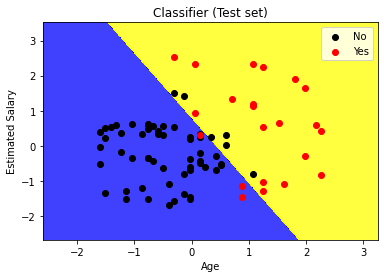

In [92]:
#driver
x,y=read_set()
xtrain,ytrain,xtest,ytest=split(x,y)
train_test_plot(xtrain,ytrain,xtest,ytest)

# 